# Computer Vision Class Notes

**What is Computer Vision?**

Computer Vision is the field that deals with acquiring and processing images and it makes decisions based on the images.

So basically it is that you pass an image to the computer and the computer tries to understand
it and it can do certain things such as it can tell you how many faces are in the image, and what color dominates the image and so on.

we can do: phase detection and motion detection

used library: openCV

In [13]:
import cv2
from matplotlib import pyplot as plt

In [14]:
img = cv2.imread('wincest.jpg',1)
#pass 1 to read the image as it is with colors
#if you want to read the image as black and white image in a grayscale

#you need to pass 0 
#meaning your image will only have one band

#passing -1 meaning your colorful image will also have an alpha channel which means the image will
#have transparency capabilities

In [5]:
print(type(img))

<class 'numpy.ndarray'>


In [6]:
print(img.shape)

(540, 960)


In [4]:
cv2.imshow('wincest_gray',img)#open a window 
cv2.waitKey(0)#to specify a time for your window to be closed 
#0 means when the user presses any button, the window will close
#eg. 2000 means 2000 milliseconds = 2 seconds
cv2.destroyAllWindows() #to specify what to do after waiting a time or pressing a button

**Notice**

If you ran this, a python crash report will occur.

The solution is very simple once you understand why Jupyter crashes.

The problem is that the image box is using the same Python process as the kernel. When you execute this from an interactive shell, the shell waits for you to get back from the image display box. But Jupyter wants to claim control back after you executed a command block. Therefore it is not happy to wait for the window, and you lose control of the Python process, crashing everything.

The Solution

To solve this, you need to use plt.

cv.imshow doesn't really make sense in a client/server environment like Jupyter. You want something that will display the image as part of the notebook (on the client side), not to run a GUI window on the server side -- that might kinda "work" when the client and server are on the same machine, but that's about it. | You already use the imshow function from matplotlib (not numpy as you seem to think), so stick with that (keeping in mind that it uses RGB rather than BGR order of color planes). 

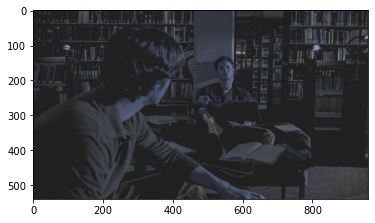

In [7]:
#Show the image with matplotlib
plt.imshow(img)
plt.show()
#but colors look wierd :(

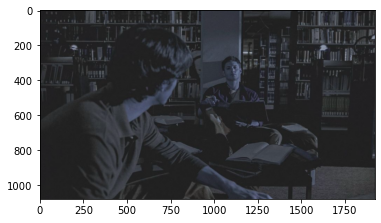

In [10]:
resized_img = cv2.resize(img,(1920,1080))
plt.imshow(resized_img)
plt.show()


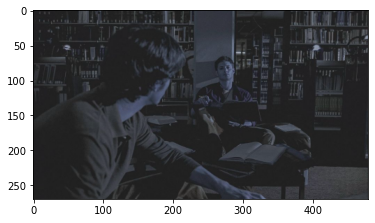

In [16]:
#or shaping your img by:
resized_img = cv2.resize(img,(int(img.shape[1]/2),int(img.shape[0]/2)))
plt.imshow(resized_img)
plt.show()

In [18]:
#save the new image
cv2.imwrite('wincest_new.jpg',resized_img)

True

Write a script that resizes all images in a directory to 100x100. You can find an attached ZIP file with some image files in the Resources.

In [36]:
import os

path = '/Users/keqinliu/pythonlearning_ml/real_world_programs_build/sample_images'

for folder,sub_folders,files in os.walk(path):
    
    for file in files:
        
        print(file)
        file_path = path + '/' + file

        img = cv2.imread(file_path,1)
        
        if img is None:
            print('Wrong path:', file_path)
        
        new_img = cv2.resize(img,(100,100))
        print(new_img.shape)
        new_file_path = path+'/new/'+file
        cv2.imwrite(new_file_path,new_img)


galaxy.jpg
(100, 100, 3)
wincest_new.jpg
(100, 100, 3)
Lighthouse.jpg
(100, 100, 3)
wincest.jpg
(100, 100, 3)
Moon sinking, sun rising.jpg
(100, 100, 3)
kangaroos-rain-australia_71370_990x742.jpg
(100, 100, 3)
galaxy.jpg
(100, 100, 3)
wincest_new.jpg
(100, 100, 3)
Lighthouse.jpg
(100, 100, 3)
wincest.jpg
(100, 100, 3)
Moon sinking, sun rising.jpg
(100, 100, 3)
kangaroos-rain-australia_71370_990x742.jpg
(100, 100, 3)


or use batch image resizing

In [43]:
import cv2
import glob

images=glob.glob("/Users/keqinliu/pythonlearning_ml/real_world_programs_build/sample_images/*.jpg")

for image in images:
    img=cv2.imread(image,0)
    re=cv2.resize(img,(100,100))
    print(re.shape)
    #cv2.imshow("Hey",re)
    #cv2.waitKey(500)
    #cv2.destroyAllWindows()
    path = image
    print(path)
    cv2.imwrite(path,re)
    

(100, 100)
/Users/keqinliu/pythonlearning_ml/real_world_programs_build/sample_images/galaxy.jpg
(100, 100)
/Users/keqinliu/pythonlearning_ml/real_world_programs_build/sample_images/wincest_new.jpg
(100, 100)
/Users/keqinliu/pythonlearning_ml/real_world_programs_build/sample_images/Lighthouse.jpg
(100, 100)
/Users/keqinliu/pythonlearning_ml/real_world_programs_build/sample_images/wincest.jpg
(100, 100)
/Users/keqinliu/pythonlearning_ml/real_world_programs_build/sample_images/Moon sinking, sun rising.jpg
(100, 100)
/Users/keqinliu/pythonlearning_ml/real_world_programs_build/sample_images/kangaroos-rain-australia_71370_990x742.jpg


## Detecting Faces In Python

the xml files contains the information about the features that an image of a face contains

source: use some images with faces as training samples

we will load an image in python and we will tell python that this is an image containing a face

<function matplotlib.pyplot.show(close=None, block=None)>

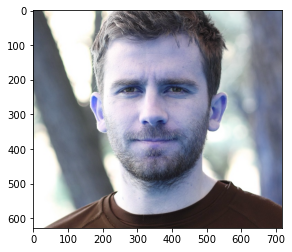

In [52]:
img_path = '/Users/keqinliu/pythonlearning_ml/real_world_programs_build/img_vid/Files/photo.jpg'
img = cv2.imread(img_path)
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

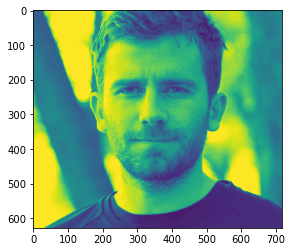

In [57]:
plt.imshow(grey_img)
plt.show

In [60]:
xml_path = '/Users/keqinliu/pythonlearning_ml/real_world_programs_build/img_vid/Files/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(xml_path)



it will return the corrdinates of the face in the image

it will give you the number of the row and the column of the upper left point of the face

and it will also give you the height and width of the face 

In [61]:
face = face_cascade.detectMultiScale(grey_img, scaleFactor=1.05, minNeighbors=5)

**scale factor**

by giving a scale factor of 1.05 you are telling python to decrease the scale by 5 percent for the next face search

so what python will do is it will down scale the image by 5 percent and it will search for bigger faces in the image so search again, again and again

so a smaller value of the scale factor means higher accuracy

**min neighbors**

and the min neighbors will tell python how many neighbors to search around the window

you can test with different value of the min neighbors to find out which gets the better result, but 5 for min neighbors and 1.05 for scale factors is well accepted numbers

In [63]:
print(type(face))

<class 'numpy.ndarray'>


In [64]:
print(face)

[[157  84 379 379]]


so we have detected the face

print(face) reported the face coordinates in the image

now we can use the coordinates to draw a tangle in the image

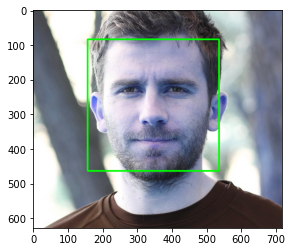

In [66]:
for x,y,w,h in face:
    img = cv2.rectangle(img,
                        (x,y),
                        (x+w,y+h),
                        (0,255,0),
                        3)

plt.imshow(img)
plt.show()

you need to pass four arguments:

the first argument would be the starting point (left and up) of the rectangle (x,y)

the second argument would be the ending point (right and down) of the rectangle (x+w,y+h)

the third argument would be the color

the fourth argument would be the width of the right tangle

<function matplotlib.pyplot.show(close=None, block=None)>

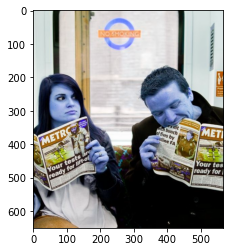

In [67]:
#try another picture
img_path = '/Users/keqinliu/pythonlearning_ml/real_world_programs_build/img_vid/Files/news.jpg'
img = cv2.imread(img_path)
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img)
plt.show

In [68]:
face = face_cascade.detectMultiScale(img, scaleFactor=1.05, minNeighbors=5)

In [69]:
print(face)

[[ 42 220 108 108]
 [305 379  84  84]]


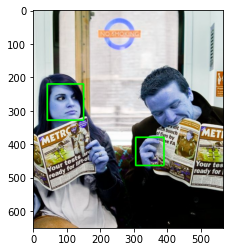

In [70]:
for x,y,w,h in face:
    img = cv2.rectangle(img,
                        (x,y),
                        (x+w,y+h),
                        (0,255,0),
                        3)

plt.imshow(img)
plt.show()

python mistreated the man's hand as a face

so you can change parameters

(but the truth is that computer has its own limitations)

## Capture Video From Python

run this in terminal but not in jupyter notebook

```
import cv2,time

video = cv2.VideoCapture(0)#numbers stand for build-in camera
#or you can pass a path of your vide

check, frame = video.read()
#we have a boolean data type here and a numpy array

print(check)
print(frame)

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

time.sleep(3) #notiece the light of the camera will turn on for 3 seconds

cv.startWindowThread()

cv2.imshow('capturing', gray)

video.release() 

cv2.waitKey(1)

cv2.destroyAllWindows()

cv2.waitKey(1)
```

check is a boolean that we can use to check whether the video is running or not

the frame is the most important one because we will use these frame objects so we'll use this numpy array which is a three-dimensional array because it's a color image. so it has three bands.  

the picture we saw is the first frame of the video

**to show a video instead of a picture, we need to use for loop**

## Detecting Faces In A Video

```
import cv2

# Load the cascade
xml_path = '/Users/keqinliu/pythonlearning_ml/real_world_programs_build/img_vid/Files/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(xml_path)

# To capture video from existing video.
cap = cv2.VideoCapture('/Users/keqinliu/Desktop/wincest.mp4')

while True:
    # Read the frame
    _, img = cap.read()

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Display
    cv2.imshow('Video', img)

    # Stop if escape key is pressed
    k = cv2.waitKey(30) & 0xff
    if k==27:
        break

# Release the VideoCapture object
cap.release()
```